In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
xgdf = pd.read_csv('../processed-data/processed-data.csv')

Now let us see what is the dataset which we will be working with for the classification

In [35]:
xgdf.head()

,Unnamed: 0,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,pca_component_1,pca_component_2
0,0,23,12,19114.12,3,3,4,7.0,1,1.0,26.822620,22.0833,0,49.574949,4.387204,3,312.494089,2.0,-616.432092,-13.474437
1,1,23,12,19114.12,3,3,4,14.0,1,2.0,31.944960,0.0000,0,49.574949,4.773057,4,284.629162,2.0,-616.461504,-17.472881
2,3,23,12,19114.12,3,3,4,4.0,1,2.0,31.377862,22.3333,0,49.574949,5.295604,6,223.451310,2.0,-616.410033,-10.475604
3,4,23,12,19114.12,3,3,4,14.0,1,2.0,24.797347,22.4167,0,49.574949,3.723768,2,341.489231,2.0,-616.400608,-8.530153
4,5,23,12,19114.12,3,3,4,4.0,1,2.0,27.262259,22.5000,0,49.574949,4.134049,0,340.479212,2.0,-616.432092,-13.474437


In [36]:
xgdf.shape

(97230, 20)

In [37]:
xgdf.dtypes

Unnamed: 0                    int64
Age                           int64
Occupation                    int64
Annual_Income               float64
Num_Bank_Accounts             int64
Interest_Rate                 int64
Num_of_Loan                   int64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries          int64
Credit_Mix                  float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                float64
pca_component_1             float64
pca_component_2             float64
dtype: object

In [38]:
xgdf.isna().sum()

Unnamed: 0                  0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Interest_Rate               0
Num_of_Loan                 0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Mix                  0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
pca_component_1             0
pca_component_2             0
dtype: int64

In [39]:
xgdf.drop(columns='Unnamed: 0',axis = 1,inplace=True)
xgdf.dropna(inplace=True)
xgdf.shape

(97230, 19)

We are dealing with a dataset which has over 90,000 records and 19 columns so we shall first sample the data to reduce the number of records to work with to increase the accuracy of the svm model.

To handle data imbalance we will take undersampled records from each of the three target variable categories and find out the optimum number for the model analysis.


In [40]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score



In [41]:
def confusion_matrix_display(actual,predicted,n):
    conf_matrix =confusion_matrix(actual, predicted)
    print(f"confusion matrix heatmap for {n} records:")
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Poor', 'Predicted Standard','Predicted Good'],
            yticklabels=['True Poor', 'True Standard','True Good'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

confusion matrix heatmap for 3000 records:


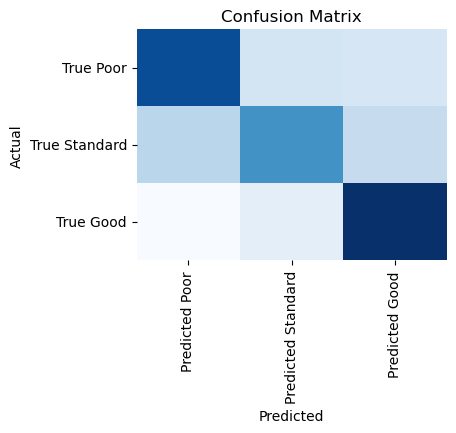

confusion matrix heatmap for 6000 records:


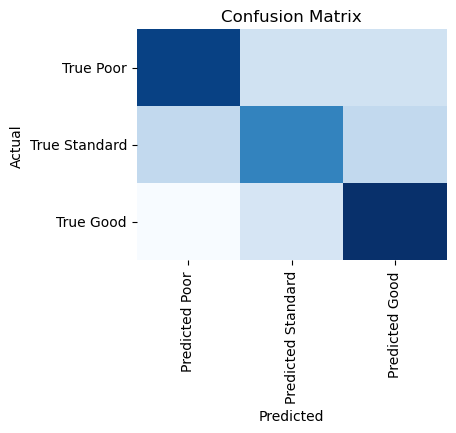

confusion matrix heatmap for 9000 records:


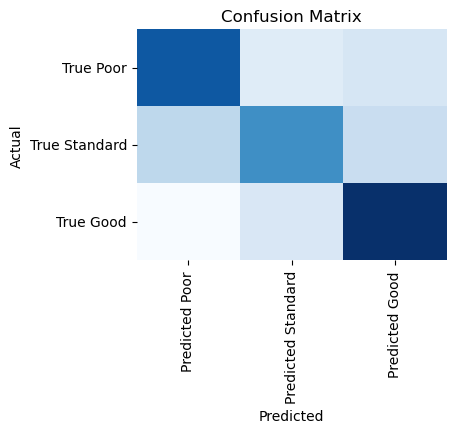

confusion matrix heatmap for 12000 records:


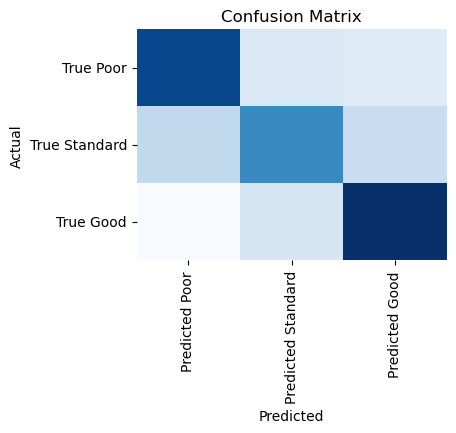

confusion matrix heatmap for 15000 records:


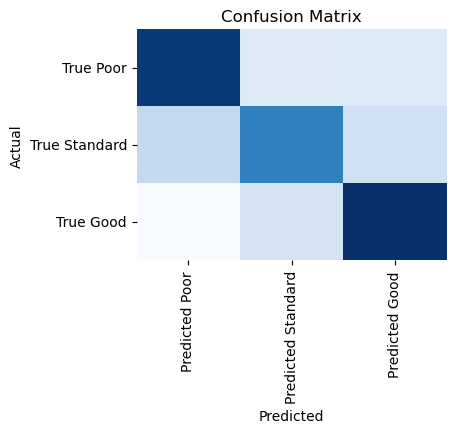

confusion matrix heatmap for 30000 records:


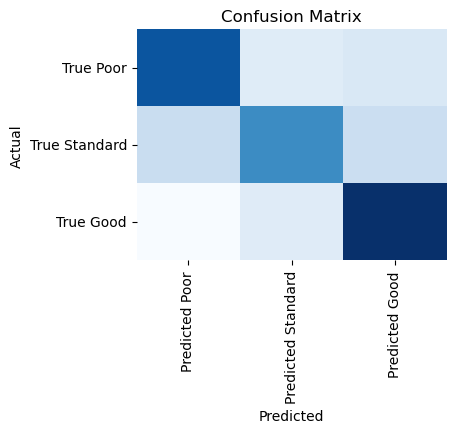

confusion matrix heatmap for 45000 records:


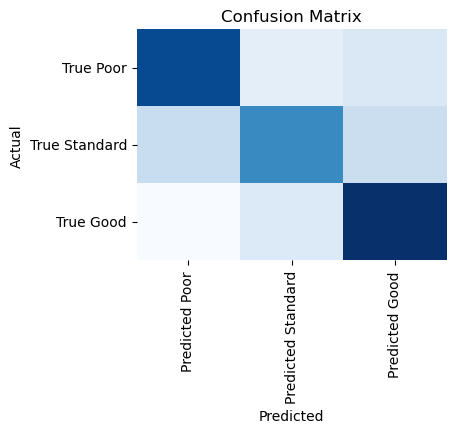

In [42]:
data = []
init_accuracy = 0
hmm = [[]]
def xgb_accuracy(n=[1000,2000,3000,4000,5000,10000,15000],xgdf = xgdf,hmm = hmm):
    for i in n:
        df0 = xgdf[xgdf['Credit_Score']==0]
        df1 = xgdf[xgdf['Credit_Score']==1]
        df2 = xgdf[xgdf['Credit_Score']==2]
        

        
        df0 = df0.sample(replace = False,n =i,random_state=42)
        df1 = df1.sample(replace = False,n = i,random_state=42)
        df2 = df2.sample(replace = False,n = i,random_state=42)
        final_df = pd.concat([df0,df1,df2])

        X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
        y = final_df['Credit_Score']


        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


        model = xgb.XGBClassifier()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average = 'weighted')
        f1 = f1_score(y_test,y_pred,average = 'weighted')
        recall = recall_score(y_test,y_pred,average = 'weighted')

        confusion_matrix_display(y_test,y_pred,i*3)



        indexx = i*3
        l1 = [indexx,accuracy,precision,f1,recall]
        data.append(l1)

    
xgb_accuracy()



In [43]:
columns = ['Iterations','Accuracy','Precision', 'Recall', 'F1-score']
scores_df = pd.DataFrame(columns=columns,data=data)
scores_df

,Iterations,Accuracy,Precision,Recall,F1-score
0,3000,0.658667,0.656542,0.653177,0.658667
1,6000,0.668000,0.668825,0.664861,0.668000
2,9000,0.684000,0.682290,0.679105,0.684000
3,12000,0.691333,0.688045,0.687458,0.691333
4,15000,0.698667,0.696458,0.695819,0.698667
5,30000,0.713867,0.713572,0.709291,0.713867
6,45000,0.721333,0.721260,0.716991,0.721333


- We have experimented with various test sizes over how the model performs over each one of them. We find that the model gives best performance with 12000 records so we shall now see how it performs after tuning its hyperparameters.

### HYPERPARAMETER TUNING

In [44]:
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold,GridSearchCV


In [51]:
df0 = xgdf[xgdf['Credit_Score']==0]
df1 = xgdf[xgdf['Credit_Score']==1]
df2 = xgdf[xgdf['Credit_Score']==2]
        

        
df0 = df0.sample(replace = False,n =15000,random_state=42)
df1 = df1.sample(replace = False,n = 15000,random_state=42)
df2 = df2.sample(replace = False,n = 15000,random_state=42)
final_df = pd.concat([df0,df1,df2])

X = final_df.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
y = final_df['Credit_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:


# param_grid = {
#     'max_depth': [2, 4, 6],
#     'learning_rate': [0.01, 0.05],
#     'n_estimators': [200, 300]
# }

# grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid,scoring='accuracy', cv=3,n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Re-initialize and re-train the model with the best parameters
# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(X_train, y_train)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [54]:
from sklearn.metrics import classification_report

In [56]:
best_model = xgb.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None)

In [55]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7112
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      3788
         1.0       0.70      0.55      0.61      3703
         2.0       0.69      0.84      0.76      3759

    accuracy                           0.71     11250
   macro avg       0.71      0.71      0.71     11250
weighted avg       0.71      0.71      0.71     11250



- We see that the base model has performed better accuracy wise compared to when the hyperparameters are tuned.
- We also notice that the base models performance increased as the number of samples increased hence we can try oversampling the data and check if it further improves our model performance

### SMOTE

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
X = xgdf.drop(columns=['Credit_Score','Amount_invested_monthly'],axis=1)
y = xgdf['Credit_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [70]:
dataset = np.concatenate((X_resampled, y_resampled.values.reshape(-1, 1)), axis=1)
dataset

array([[ 3.90000000e+01,  1.00000000e+01,  7.40170800e+04, ...,
         1.59458167e+03,  2.22913892e+01,  1.00000000e+00],
       [ 2.10000000e+01,  3.00000000e+00,  1.86008800e+04, ...,
         3.52208056e+03, -2.86977785e+01,  0.00000000e+00],
       [ 2.60000000e+01,  1.20000000e+01,  5.08074400e+04, ...,
        -2.22497449e+02, -6.47134170e+00,  1.00000000e+00],
       ...,
       [ 4.10000000e+01,  9.00000000e+00,  2.31286528e+04, ...,
        -9.64689374e+02,  1.21212072e+01,  2.00000000e+00],
       [ 4.10000000e+01,  2.00000000e+00,  1.58483480e+05, ...,
         6.70039175e+01,  1.54661684e+00,  2.00000000e+00],
       [ 5.40000000e+01,  7.00000000e+00,  1.29231064e+07, ...,
         2.22721163e+03, -3.21661128e+00,  2.00000000e+00]])

In [60]:
X_resampled

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,pca_component_1,pca_component_2
0,39,10,7.401708e+04,6,20,6,25.000000,2,0.000000,30.387873,2.916700,1,218.999711,1,513.017233,1594.581673,22.291389
1,21,3,1.860088e+04,5,5,6,16.000000,2,1.000000,31.113191,14.500000,1,73.889782,5,243.519140,3522.080563,-28.697778
2,26,12,5.080744e+04,8,11,4,8.000000,1,1.000000,30.058853,22.500000,1,88.759919,2,427.050926,-222.497449,-6.471342
3,40,10,3.564360e+04,1662,9,4,22.000000,2,1.000000,40.464755,5.916700,1,60.039540,5,422.146685,-1225.442660,-0.011992
4,50,3,2.341476e+04,3,7,2,20.000000,-2,1.000000,30.021333,19.416700,1,28.831610,3,379.715078,497.865143,-1.606460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116314,44,1,2.989470e+04,4,19,-16,13.447052,2,1.000000,26.242483,2.998984,1,95.870089,4,330.719341,-83.721223,-12.527855
116315,27,4,1.412841e+04,6,29,9,19.601536,2,0.300768,36.477287,3.935037,1,93.956977,4,247.216568,-418.069721,-12.615255
116316,41,9,2.312865e+04,4,7,1,14.000000,1,1.991884,30.259040,15.632671,0,28.442818,5,361.621469,-964.689374,12.121207
116317,41,2,1.584835e+05,2,6,3,2.814600,1,2.000000,32.066870,28.036950,0,347.535460,4,452.577762,67.003918,1.546617


In [71]:
feature_columns = []
for column_name in X_resampled.columns:
    feature_columns.append(column_name)
target_column = 'Credit_Score'

In [72]:
df = pd.DataFrame(dataset, columns=feature_columns + [target_column])

In [74]:
df

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,pca_component_1,pca_component_2,Credit_Score
0,39.0,10.0,7.401708e+04,6.0,20.0,6.0,25.000000,2.0,0.000000,30.387873,2.916700,1.0,218.999711,1.0,513.017233,1594.581673,22.291389,1.0
1,21.0,3.0,1.860088e+04,5.0,5.0,6.0,16.000000,2.0,1.000000,31.113191,14.500000,1.0,73.889782,5.0,243.519140,3522.080563,-28.697778,0.0
2,26.0,12.0,5.080744e+04,8.0,11.0,4.0,8.000000,1.0,1.000000,30.058853,22.500000,1.0,88.759919,2.0,427.050926,-222.497449,-6.471342,1.0
3,40.0,10.0,3.564360e+04,1662.0,9.0,4.0,22.000000,2.0,1.000000,40.464755,5.916700,1.0,60.039540,5.0,422.146685,-1225.442660,-0.011992,1.0
4,50.0,3.0,2.341476e+04,3.0,7.0,2.0,20.000000,-2.0,1.000000,30.021333,19.416700,1.0,28.831610,3.0,379.715078,497.865143,-1.606460,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116314,44.0,1.0,2.989470e+04,4.0,19.0,-16.0,13.447052,2.0,1.000000,26.242483,2.998984,1.0,95.870089,4.0,330.719341,-83.721223,-12.527855,2.0
116315,27.0,4.0,1.412841e+04,6.0,29.0,9.0,19.601536,2.0,0.300768,36.477287,3.935037,1.0,93.956977,4.0,247.216568,-418.069721,-12.615255,2.0
116316,41.0,9.0,2.312865e+04,4.0,7.0,1.0,14.000000,1.0,1.991884,30.259040,15.632671,0.0,28.442818,5.0,361.621469,-964.689374,12.121207,2.0
116317,41.0,2.0,1.584835e+05,2.0,6.0,3.0,2.814600,1.0,2.000000,32.066870,28.036950,0.0,347.535460,4.0,452.577762,67.003918,1.546617,2.0


confusion matrix heatmap for 30000 records:


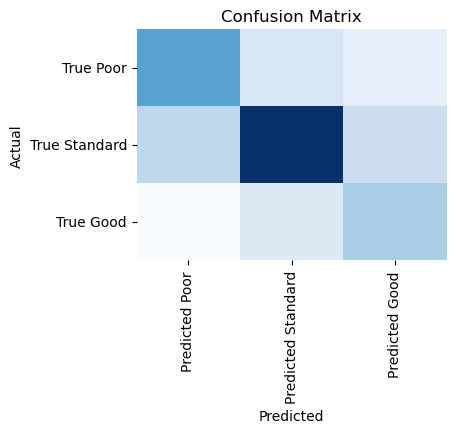

confusion matrix heatmap for 45000 records:


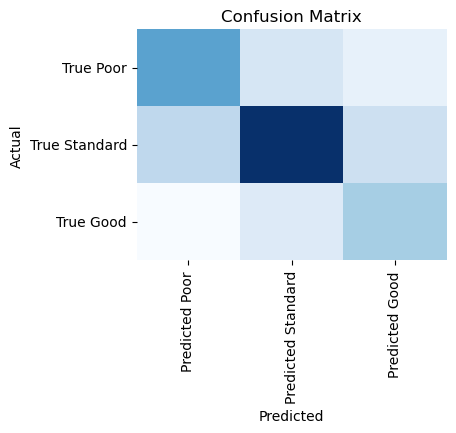

confusion matrix heatmap for 60000 records:


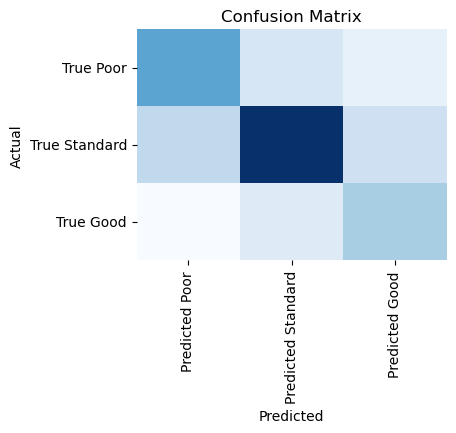

confusion matrix heatmap for 75000 records:


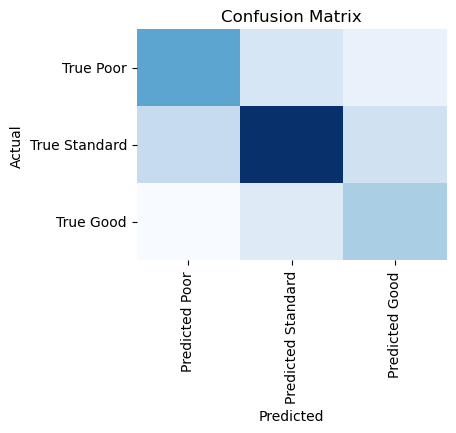

confusion matrix heatmap for 90000 records:


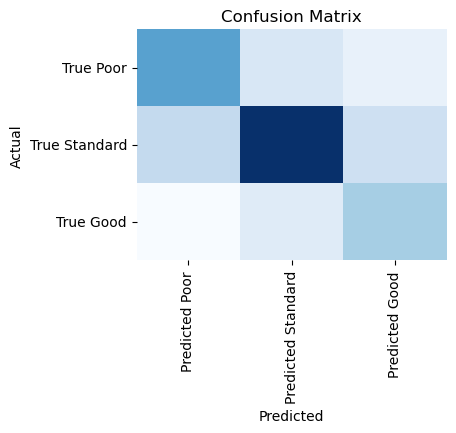

confusion matrix heatmap for 105000 records:


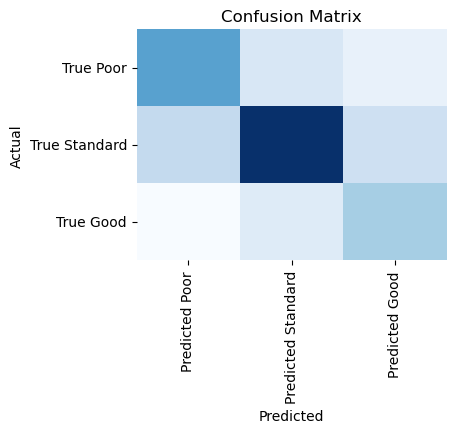

In [77]:
data_SMOTE = []
def xgb_accuracy_smote(n=[10000,15000,20000,25000,30000,35000],xgdf = df,hmm = hmm,X_test=X_test,y_test=y_test,data=data_SMOTE):
    for i in n:
        df0 = xgdf[xgdf['Credit_Score']==0]
        df1 = xgdf[xgdf['Credit_Score']==1]
        df2 = xgdf[xgdf['Credit_Score']==2]
        

        
        df0 = df0.sample(replace = False,n =i,random_state=42)
        df1 = df1.sample(replace = False,n = i,random_state=42)
        df2 = df2.sample(replace = False,n = i,random_state=42)
        final_df = pd.concat([df0,df1,df2])

        X_train = final_df.drop(columns=['Credit_Score'],axis=1)
        y_train = final_df['Credit_Score']


        

        model = xgb.XGBClassifier()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average = 'weighted')
        f1 = f1_score(y_test,y_pred,average = 'weighted')
        recall = recall_score(y_test,y_pred,average = 'weighted')

        confusion_matrix_display(y_test,y_pred,i*3)



        indexx = i*3
        l1 = [indexx,accuracy,precision,f1,recall]
        data.append(l1)

    
xgb_accuracy_smote()

In [78]:
columns = ['Iterations','Accuracy','Precision', 'Recall', 'F1-score']
scores_df = pd.DataFrame(columns=columns,data=data_SMOTE)
scores_df

,Iterations,Accuracy,Precision,Recall,F1-score
0,30000,0.672618,0.687833,0.676113,0.672618
1,45000,0.680434,0.694487,0.683574,0.680434
2,60000,0.684137,0.697712,0.687187,0.684137
3,75000,0.691583,0.703263,0.694405,0.691583
4,90000,0.692653,0.706421,0.695687,0.692653
5,105000,0.690760,0.704483,0.693820,0.690760


### Summary


- We started off with a base xgboost model and ran it across different sample sizes of our dataset.
- It showed best results accuracy wise on the highest sample size of 45000 records. Taking this into consideration we have taken oversampling of data later into consideration.
- We tuned the hyperparamters to see if the model performs better compared to the base model however the base model outperformed the tuned model.
- Finally, We used SMOTE to see if this improves the models performance however we see that the model's performance dips after the smote analysis. Hence, the initial model which fit over 45000 records is the best model performance metrics wise.